# Project 3

In this project, you will perform a logistic regression on the admissions data we've been working with in projects 1 and 2.

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np


In [20]:
df_raw = pd.read_csv("../assets/admissions.csv")
df = df_raw.dropna() 
print df.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Part 1. Frequency Tables

#### 1. Let's create a frequency table of our variables

In [39]:
# frequency table for prestige and whether or not someone was admitted
pd.crosstab(df['prestige'], df.admit)
#df.head()

admit,0,1
prestige,,
1.0,28,33
2.0,95,53
3.0,93,28
4.0,55,12


In [22]:
from sklearn.linear_model import LogisticRegression

feature_cols = ['gre', 'gpa']
X = df[feature_cols]
y = df['admit']

logreg = LogisticRegression()
logreg.fit(X,y)

print zip(feature_cols,logreg.coef_)
print zip(feature_cols,logreg.intercept_)

# examine some example predictions
print logreg.predict_proba(X)[:,1]
#print logreg.predict_proba(2)
#print logreg.predict_proba(3)

[('gre', array([ 0.00208469,  0.01773589]))]
[('gre', -2.0331085041348724)]
[ 0.2356103   0.3561485   0.42692446  0.34472061  0.28964642  0.4023858
  0.30728832  0.24147593  0.30001014  0.37653101  0.42692446  0.25755147
  0.40665806  0.37304007  0.37686415  0.27459271  0.41619576  0.22492111
  0.42584     0.30157681  0.28200472  0.35598584  0.32469516  0.36379283
  0.40387944  0.42544976  0.33702678  0.29261116  0.41339738  0.29096188
  0.30146475  0.40387944  0.32695479  0.42692446  0.2267195   0.24137849
  0.31727032  0.28953695  0.2818611   0.28873497  0.30517821  0.3175393
  0.32597982  0.28250775  0.37245952  0.26640081  0.31807764  0.28128705
  0.2550498   0.24235414  0.34740978  0.25724636  0.39396739  0.36412129
  0.35480754  0.39663831  0.3080817   0.23347692  0.24333247  0.32469516
  0.33532485  0.30857341  0.34664618  0.36650638  0.32015862  0.32769677
  0.39502653  0.33579938  0.3189631   0.42575327  0.34797294  0.20490555
  0.2744161   0.32015862  0.38439363  0.38670453  

## Part 2. Return of dummy variables

#### 2.1 Create class or dummy variables for prestige 

In [23]:
dum_prestige = pd.get_dummies(df['prestige'],prefix='prestige')
df = df.join(dum_prestige)

#del df['1.0'] - Unable to delete the dummy columns 1.0/2.0/3.0/4.0
#dum_prestige

df.head()

,admit,gre,gpa,prestige,prestige_1.0,prestige_2.0,prestige_3.0,prestige_4.0
0,0,380.0,3.61,3.0,0.0,0.0,1.0,0.0
1,1,660.0,3.67,3.0,0.0,0.0,1.0,0.0
2,1,800.0,4.00,1.0,1.0,0.0,0.0,0.0
3,1,640.0,3.19,4.0,0.0,0.0,0.0,1.0
4,0,520.0,2.93,4.0,0.0,0.0,0.0,1.0


#### 2.2 When modeling our class variables, how many do we need? 



Answer: While creating dummy/class variable for any feature we need n-1 dummy vairables for a feature with n different options.

## Part 3. Hand calculating odds ratios

Develop your intuition about expected outcomes by hand calculating odds ratios.

In [24]:
cols_to_keep = ['admit', 'gre', 'gpa']
handCalc = df[cols_to_keep].join(dum_prestige.ix[:, 'prestige_1':])
print handCalc.head()

   admit    gre   gpa  prestige_1.0  prestige_2.0  prestige_3.0  prestige_4.0
0      0  380.0  3.61           0.0           0.0           1.0           0.0
1      1  660.0  3.67           0.0           0.0           1.0           0.0
2      1  800.0  4.00           1.0           0.0           0.0           0.0
3      1  640.0  3.19           0.0           0.0           0.0           1.0
4      0  520.0  2.93           0.0           0.0           0.0           1.0


In [34]:
#crosstab prestige 1 admission 
# frequency table cutting prestige and whether or not someone was admitted
feature_cols = ['prestige_1.0']
X = df[feature_cols]
y = df['admit']

logreg = LogisticRegression()
logreg.fit(X,y)

print zip(feature_cols,np.exp(logreg.coef_))
print zip(feature_cols,np.exp(logreg.intercept_))


[('prestige_1.0', array([ 2.79576381]))]
[('prestige_1.0', 0.39395734648013914)]


#### 3.1 Use the cross tab above to calculate the odds of being admitted to grad school if you attended a #1 ranked college

In [35]:
logodds = logreg.intercept_
odds = np.exp(logodds) * np.exp(1 * logreg.coef_)
prob = odds/(1+odds)

print odds
print prob

[[ 1.10141169]]
[[ 0.52412942]]


#### 3.2 Now calculate the odds of admission if you did not attend a #1 ranked college

In [37]:
feature_cols = ['prestige_2.0','prestige_3.0','prestige_4.0']
X = df[feature_cols]
y = df['admit']

logreg = LogisticRegression()
logreg.fit(X,y)

print zip(feature_cols,logreg.coef_[0])
print 'intercept',logreg.intercept_

[('prestige_2.0', -0.53631146023411969), ('prestige_3.0', -1.1176217983220713), ('prestige_4.0', -1.3586152635177717)]
intercept [-0.0315439]


#### 3.3 Calculate the odds ratio

In [28]:
logodds = logreg.intercept_
odds = np.exp(logodds)
prob = odds/(1+odds)

print odds
print prob

[ 0.96894842]
[ 0.49211468]


#### 3.4 Write this finding in a sentenance: 

Answer: Probability of getting admission with #1 ranked college is 28% while the combined probability of getting admission for a Ranked 2,3 and 4 school is 49% which shows that the prestige of school is a deciding factor in getting admission

#### 3.5 Print the cross tab for prestige_4

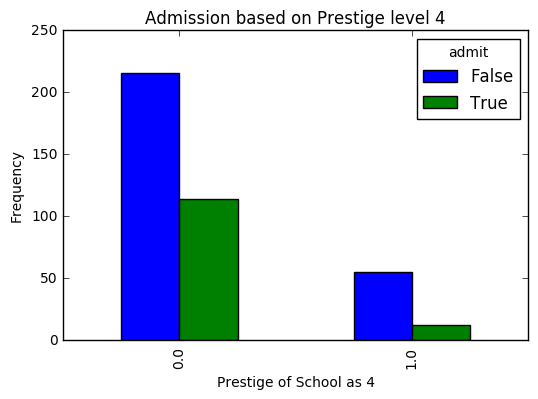

In [29]:
pd.crosstab(df['prestige_4.0'], df.admit.astype(bool)).plot(kind='bar')
plt.title ('Admission based on Prestige level 4')
plt.xlabel ('Prestige of School as 4')
plt.ylabel ('Frequency')

#### 3.6 Calculate the OR 

#### 3.7 Write this finding in a sentence

Answer:

## Part 4. Analysis

In [30]:
# create a clean data frame for the regression
cols_to_keep = ['admit', 'gre', 'gpa']
data = df[cols_to_keep].join(dum_prestige.ix[:, 'prestige_2':])
print data.head()

   admit    gre   gpa  prestige_2.0  prestige_3.0  prestige_4.0
0      0  380.0  3.61           0.0           1.0           0.0
1      1  660.0  3.67           0.0           1.0           0.0
2      1  800.0  4.00           0.0           0.0           0.0
3      1  640.0  3.19           0.0           0.0           1.0
4      0  520.0  2.93           0.0           0.0           1.0


We're going to add a constant term for our Logistic Regression. The statsmodels function we're going to be using requires that intercepts/constants are specified explicitly.

In [31]:
# manually add the intercept
data['intercept'] = 1.0
data.head()

,admit,gre,gpa,prestige_2.0,prestige_3.0,prestige_4.0,intercept
0,0,380.0,3.61,0.0,1.0,0.0,1.0
1,1,660.0,3.67,0.0,1.0,0.0,1.0
2,1,800.0,4.00,0.0,0.0,0.0,1.0
3,1,640.0,3.19,0.0,0.0,1.0,1.0
4,0,520.0,2.93,0.0,0.0,1.0,1.0


#### 4.1 Set the covariates to a variable called train_cols

In [32]:
train_cols = ['gre','gpa','prestige_2.0','intercept']

#### 4.2 Fit the model

In [33]:
X = data[train_cols]
y = data.admit

logreg = LinearRegression()
logreg.fit(X,y)

NameError: name 'LinearRegression' is not defined

#### 4.3 Print the summary results

In [ ]:
print zip(train_cols,logreg.coef_)
print zip(train_cols,logreg.intercept_)

#### 4.4 Calculate the odds ratios of the coeffiencents and their 95% CI intervals

hint 1: np.exp(X)

hint 2: conf['OR'] = params
        
           conf.columns = ['2.5%', '97.5%', 'OR']

In [ ]:
logodds = logreg.coef_
odds = np.exp(logodds)
prob = odds/(1+odds)

print odds
print prob

#### 4.5 Interpret the OR of Prestige_2

Answer: 

#### 4.6 Interpret the OR of GPA

Answer: 

## Part 5: Predicted probablities


As a way of evaluating our classifier, we're going to recreate the dataset with every logical combination of input values. This will allow us to see how the predicted probability of admission increases/decreases across different variables. First we're going to generate the combinations using a helper function called cartesian (above).

We're going to use np.linspace to create a range of values for "gre" and "gpa". This creates a range of linearly spaced values from a specified min and maximum value--in our case just the min/max observed values.

In [ ]:
def cartesian(arrays, out=None):
    """
    Generate a cartesian product of input arrays.
    Parameters
    ----------
    arrays : list of array-like
        1-D arrays to form the cartesian product of.
    out : ndarray
        Array to place the cartesian product in.
    Returns
    -------
    out : ndarray
        2-D array of shape (M, len(arrays)) containing cartesian products
        formed of input arrays.
    Examples
    --------
    >>> cartesian(([1, 2, 3], [4, 5], [6, 7]))
    array([[1, 4, 6],
           [1, 4, 7],
           [1, 5, 6],
           [1, 5, 7],
           [2, 4, 6],
           [2, 4, 7],
           [2, 5, 6],
           [2, 5, 7],
           [3, 4, 6],
           [3, 4, 7],
           [3, 5, 6],
           [3, 5, 7]])
    """

    arrays = [np.asarray(x) for x in arrays]
    dtype = arrays[0].dtype

    n = np.prod([x.size for x in arrays])
    if out is None:
        out = np.zeros([n, len(arrays)], dtype=dtype)

    m = n / arrays[0].size
    out[:,0] = np.repeat(arrays[0], m)
    if arrays[1:]:
        cartesian(arrays[1:], out=out[0:m,1:])
        for j in xrange(1, arrays[0].size):
            out[j*m:(j+1)*m,1:] = out[0:m,1:]
    return out

In [ ]:
# instead of generating all possible values of GRE and GPA, we're going
# to use an evenly spaced range of 10 values from the min to the max 
gres = np.linspace(data['gre'].min(), data['gre'].max(), 10)
print gres
# array([ 220.        ,  284.44444444,  348.88888889,  413.33333333,
#         477.77777778,  542.22222222,  606.66666667,  671.11111111,
#         735.55555556,  800.        ])
gpas = np.linspace(data['gpa'].min(), data['gpa'].max(), 10)
print gpas
# array([ 2.26      ,  2.45333333,  2.64666667,  2.84      ,  3.03333333,
#         3.22666667,  3.42      ,  3.61333333,  3.80666667,  4.        ])


# enumerate all possibilities
combos = pd.DataFrame(cartesian([gres, gpas, [1, 2, 3, 4], [1.]]))

#### 5.1 Recreate the dummy variables

In [ ]:
# recreate the dummy variables

# keep only what we need for making predictions


#### 5.2 Make predictions on the enumerated dataset

#### 5.3 Interpret findings for the last 4 observations

Answer: 

## Bonus

Plot the probability of being admitted into graduate school, stratified by GPA and GRE score.